# **CIS 4190/5190 Homework 3 - Spring 2024**

In [3]:
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## **PennGrader Setup**
First, you'll need to set up the PennGrader, an autograder we are going to use throughout the semester. The PennGrader will automatically grade your answer and provide you with an instant feedback. Unless otherwise stated, you can resubmit up to a reasonable number of attempts (e.g. 100 attemptes per day). **We will only record your latest score in our backend database**.

After finishing each homework assignment, you must submit your iPython notebook to gradescope before the homework deadline. Gradescope will then retrive and display your scores from our backend database.

In [1]:
%%capture
!pip install penngrader-client

In [2]:
%%writefile student_config.yaml
grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing student_config.yaml


In [4]:
from penngrader.grader import *

## **Autograder Setup**
Enter your 8-digit PennID below:

In [5]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 29869722      # YOUR PENN-ID GOES HERE AS AN INTEGER#

Run the following cell to initialize the autograder. This autograder will let you submit your code directly from this notebook and immediately get a score.

**NOTE:** Remember we store your submissions and check against other student's submissions... so, not that you would, but no cheating.

In [6]:
grader = PennGrader('student_config.yaml', 'cis5190_sp24_HW3', STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 29869722

Make sure this correct or we will not be able to store your grade


In [7]:
# Serialization code needed by the autograder
import inspect, sys
from IPython.core.magics.code import extract_symbols

def new_getfile(object, _old_getfile=inspect.getfile):
    if not inspect.isclass(object):
        return _old_getfile(object)

    # Lookup by parent module (as in current inspect)
    if hasattr(object, '__module__'):
        object_ = sys.modules.get(object.__module__)
        if hasattr(object_, '__file__'):
            return object_.__file__

    # If parent module is __main__, lookup by methods (NEW)
    for name, member in inspect.getmembers(object):
        if inspect.isfunction(member) and object.__qualname__ + '.' + member.__name__ == member.__qualname__:
            return inspect.getfile(member)
    else:
        raise TypeError('Source for {!r} not found'.format(object))
inspect.getfile = new_getfile

def grader_serialize(obj):
    cell_code = "".join(inspect.linecache.getlines(new_getfile(obj)))
    class_code = extract_symbols(cell_code, obj.__name__)[0][0]
    return class_code

## **Datasets**
Next, we will download all datasets from Google Drive to your local runtime. After successful download, you may verify that all datasets are present in your colab instance.

HW1 Datasets:
- [cis519_hw1_diabetes_train.csv](https://drive.google.com/file/d/1wfZ375m-HOvtWb8fBUjZ2zbW5nkXtlVx/view?usp=sharing)
- [cis519_hw1_diabetes_test.csv](https://drive.google.com/file/d/14DGsr_eIHRGnDw4o7FVBFUVfg_MljzzO/view?usp=sharing)

In [8]:
if not os.path.exists("cis519_hw1_diabetes_train.csv"):
    !curl "https://drive.usercontent.google.com/download?id=1wfZ375m-HOvtWb8fBUjZ2zbW5nkXtlVx&confirm=xxx" > cis519_hw1_diabetes_train.csv
    !curl "https://drive.usercontent.google.com/download?id=14DGsr_eIHRGnDw4o7FVBFUVfg_MljzzO&confirm=xxx" > cis519_hw1_diabetes_X_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  512k  100  512k    0     0   470k      0  0:00:01  0:00:01 --:--:--  471k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  123k  100  123k    0     0   150k      0 --:--:-- --:--:-- --:--:--  150k


#### **NOTE: Results of sections marked as "manually graded" should be submitted along with the written homework solutions.**

# **1. Logistic Regression**

## **1.1. Logistic Regression Implementation [18 pts, autograded]**

Implement logistic regression with both L1 and L2 regularization by completing the LogisticRegression class.  

Your class must implement the following API:

* `__init__(alpha, tol, max_iter, theta_init, penalty, lambd)`
* `sigmoid(x)`
* `compute_cost(theta, X, y)`
* `compute_gradient(theta, X, y)`
* `has_converged(theta_old, theta_new)`
* `fit(X, y)`
* `predict_proba(X)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the LogisticRegression class. **DO NOT** change the API.

---

### **1.1.1. Sigmoid Function [1 pt]**

You should begin by implementing the `sigmoid` function.  As you may know, the sigmoid function $\sigma(x)$ is mathematically defined as follows.

> $\sigma(x) = \frac{1}{1\ +\ \text{exp}(-x)}$

**Be certain that your sigmoid function works with both vectors and matrices** --- for either a vector or a matrix, you function should perform the sigmoid function on every element.

---

### **1.1.2. Cost Function [5 pts]**

The `compute_cost` function should compute the cost for a given $\theta$ vector. The cost is a scalar value given by:

> $
\mathcal{L}({\theta}) = -\sum_{i =1}^N [ y_i\log(h_{{\theta}}({x}_i)) + (1 - y_i)\log(1 - h_{{\theta}}({x}_i))]
$

where
> $
h_{\theta}(x_{i}) = \sigma(\theta^{T}x_{i})
$


L1 Regularisation Loss:
>$
\mathcal{L1}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  |{\theta}_j|
$

L2 Regularisation Loss:
>$
\mathcal{L2}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  {\theta}_j^2
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\theta$ is a $D + 1$ dimensional vector, with the first element being the intercept term. Note that we do not include the intercept in the regularization terms.

---

### **1.1.3. Gradient of the Cost Function [5 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\theta$.

---

### **1.1.4. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not. Refer 2.1.5 for convergence condition.

---

### **1.1.5. Training [3 pts]**

The `fit` method should train the model via gradient descent, relying on the cost and gradient functions. The trained weights/coefficients must be stored as `theta_`. The weights start as a zero vector. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$,
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance).

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **1.1.6. Predict Probability [1 pt]**

The `predict_probability` function should predict the probabilities that the data points in a given input data matrix belong to class 1.

---

### **1.1.7. Predict [2 pts]**

The `predict` function should predict the classes of the data points in a given input data matrix.

In [9]:
class LogisticRegression:

    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration

    """

    def __init__(self, alpha=0.01, tol=0.0001, max_iter=10000, theta_init=None, penalty = None, lambd = 1.0):

        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter
        self.theta_init = theta_init
        self.penalty = penalty
        self.lambd = lambd
        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None

    def get_params(self, deep=True):
        # a function needed for using cross_val_score function from sklearn.model_selection
        return {"alpha": self.alpha, "max_iter": self.max_iter, "lambd" : self.lambd, "penalty" : self.penalty}

    def sigmoid(self, x):

        """
        Compute the sigmoid value of the argument.

        Parameters
        ----------
        x: numpy.ndarray

        Returns
        -------
        out: numpy.ndarray
            The sigmoid value of x
        """

        # TODO START: Complete the function

        sigma = 1 / (1 + np.exp (-x))
        return sigma

        # TODO END

    def compute_cost(self, theta, X, y):



        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        # DO NOT use np.dot for this function as it can possibly return nan. Use a combination of np.nansum and np.multiply.
        m = len(y)
        theta = theta.reshape((-1, 1))
        y = y.reshape((-1, 1))

        z = np.multiply(X, theta.T)
        h = self.sigmoid(np.nansum(z, axis=1)).reshape((-1, 1))

        term1 = np.multiply(y, np.log(h))
        term2 = np.multiply((1 - y), np.log(1 - h))
        cost = - np.nansum(term1 + term2)

        if self.penalty == 'l2':
            reg_cost = (self.lambd ) * np.nansum(np.square(theta[1:]))
            cost += reg_cost
        elif self.penalty == 'l1':
            reg_cost = (self.lambd ) * np.nansum(np.abs(theta[1:]))
            cost += reg_cost

        return cost

    def compute_gradient(self, theta, X, y):

        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        m = len(y)

        h = self.sigmoid(np.dot(X, theta))
        error = h - y

        gradient = X.T.dot(error)

        # # z = np.multiply(X, theta.T)  # Element-wise multiplication
        # h = self.sigmoid(np.nansum(z, axis=1)).reshape((-1, 1))  # Sigmoid of summed values


        if self.penalty == 'l2':
            reg_gradient = 2 * np.hstack([0, self.lambd * theta[1:]])
            gradient += reg_gradient
        elif self.penalty == 'l1':
            reg_gradient = np.hstack([0, self.lambd * np.sign(theta[1:])])
            gradient += reg_gradient

        return gradient
        # TODO END

    def has_converged(self, theta_old, theta_new):

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function
        dis = np.linalg.norm(theta_new - theta_old)
        if dis < self.tol:
          converged = True
        else:
          converged = False

        return converged

        # TODO END

    def fit(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        self.hist_theta_ = ([theta_old])
        y = np.array(y)
        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = ([cost])

        # TODO START: Complete the function
        #n_features = X.shape[1]
        self.theta_ = np.zeros(D+1)
        #self.theta_.append()

        for iteration in range(self.max_iter):
            cost = self.compute_cost( self.theta_,X, y)
            gradient = self.compute_gradient( self.theta_,X, y)
            theta_new = self.theta_ - self.alpha * gradient

            self.hist_theta_.append(theta_new)
            self.hist_cost_.append(cost)
            self.theta_ = theta_new

        # TODO END

    def predict_proba(self, X):

        """
        Predict the probabilities that the data points in X belong to class 1.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted probabilities that the data points in X belong to class 1
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))

        # TODO START: Complete the function

        z = np.dot(X, self.theta_)

        y_hat = self.sigmoid(z)
        return y_hat
        # TODO END

    def predict(self, X):

        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """

        # # TODO START: Complete the function
        # N = X.shape[0]
        # X = np.hstack((np.ones((N, 1)), X))

        # TODO START: Complete the function
        probabilities = self.predict_proba(X)
        y_pred = (probabilities >= 0.5).astype(int)
        return y_pred
        # TODO END

In [10]:
def test_log_reg_sigmoid(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case = np.array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])
    student_ans = student_lr_clf.sigmoid(test_case)
    required_ans = np.array([0.83539354, 0.35165864, 0.3709434 , 0.25483894, 0.70378922])
    print (student_ans)

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_sigmoid(LogisticRegression)

[0.83539354 0.35165864 0.3709434  0.25483894 0.70378922]


In [64]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_sigmoid', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [65]:
def test_log_reg_compute_cost(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.467975765663204
    print (student_ans)
    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.52915138076548

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    print (student_ans)
    required_ans = 7.505400330283089
    assert np.abs(student_ans - required_ans) <= 1e-2

test_log_reg_compute_cost(LogisticRegression)

7.46797573976548
7.505400330283089


In [66]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_compute_cost', answer = grader_serialize(LogisticRegression))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [67]:
def test_log_reg_compute_gradient(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.20203139])
    print(student_ans)
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.30203139])
    print(student_ans)
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.32438267])
    print(student_ans)
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_compute_gradient(LogisticRegression)

[ 2.60573737 -2.20203139]
[ 2.60573737 -2.30203139]
[ 2.60573737 -2.32438267]


In [68]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_compute_gradient', answer = grader_serialize(LogisticRegression))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [69]:
def test_log_reg_has_converged(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case_theta_old = np.array([ 1.62434536, -0.61175641])
    test_case_theta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_clf.has_converged(test_case_theta_old, test_case_theta_new)
    required_ans = True

    assert student_ans == required_ans

test_log_reg_has_converged(LogisticRegression)

In [70]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_has_converged', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [71]:
def test_log_reg_fit(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.hist_theta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
                             [ 0.005     , -0.00597503,  0.00564325],
                             [ 0.01006813, -0.01184464,  0.0111865 ],
                             [ 0.01520121, -0.01761226,  0.01663348],
                             [ 0.02039621, -0.02328121,  0.02198778],
                             [ 0.02565018, -0.0288547 ,  0.02725288]])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_fit(LogisticRegression)

In [72]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_fit', answer = grader_serialize(LogisticRegression))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [73]:
def test_log_reg_predict_proba(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict_proba(test_case_X)
    print (student_ans)
    required_ans = np.array([0.49052814, 0.5029122 , 0.48449386, 0.48864172, 0.50241207])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_predict_proba(LogisticRegression)

[0.49052814 0.5029122  0.48449386 0.48864172 0.50241207]


In [74]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_predict_proba', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [75]:
def test_log_reg_predict(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict(test_case_X)
    print (student_ans)

    required_ans = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
                             0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])
    assert np.mean(np.abs(student_ans - required_ans)) <= 0.02

test_log_reg_predict(LogisticRegression)

[0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 1 1 0 0 0 0 1]


In [76]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_predict', answer = grader_serialize(LogisticRegression))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.2. Effect of learning rate on gradient descent [5 pts, manually graded]**



Run the below cell to download the dataset.

In [11]:
if not os.path.exists("cis519_hw2_admit.csv"):
  !curl "https://drive.usercontent.google.com/download?id=1CSD1vA9qZucuevxCuaOwr91tBaZcjNNh&confirm=xxx" > cis519_hw2_admit.csv
train_df = pd.read_csv("cis519_hw2_admit.csv")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3609  100  3609    0     0   5452      0 --:--:-- --:--:-- --:--:--  5451


The dataset contains two features - scores in two exams and the target variable is whether the student was admitted into a college or not. Your task for this question is to use this dataset and plot the variation of cost function with respect to the number of gradient descent iterations for different learning rates. Perform the following steps.

1. Scale the features using StandardScaler
2. For each of the learning rates - {0.001, 0.01, 0.1, 0.25}, fit a logistic regression model to the scaled data by running a maximum of 100 iterations of gradient descent with L2 penalty and $\lambda$ as 0.001.
3. Show the variation of the cost (stored in `hist_cost_`) with respect to the number of iterations for all the learning rates in the same plot.

Submit the plot along with the written homework solutions. The plot should have an appropriate title, axes labels, and legend. Briefly comment on the effect of increasing learning rate and what would be the best learning rate among the four values based on the plot.

In [78]:
train_df

,Exam 1 Score,Exam 2 Score,Admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


101
101
101
101


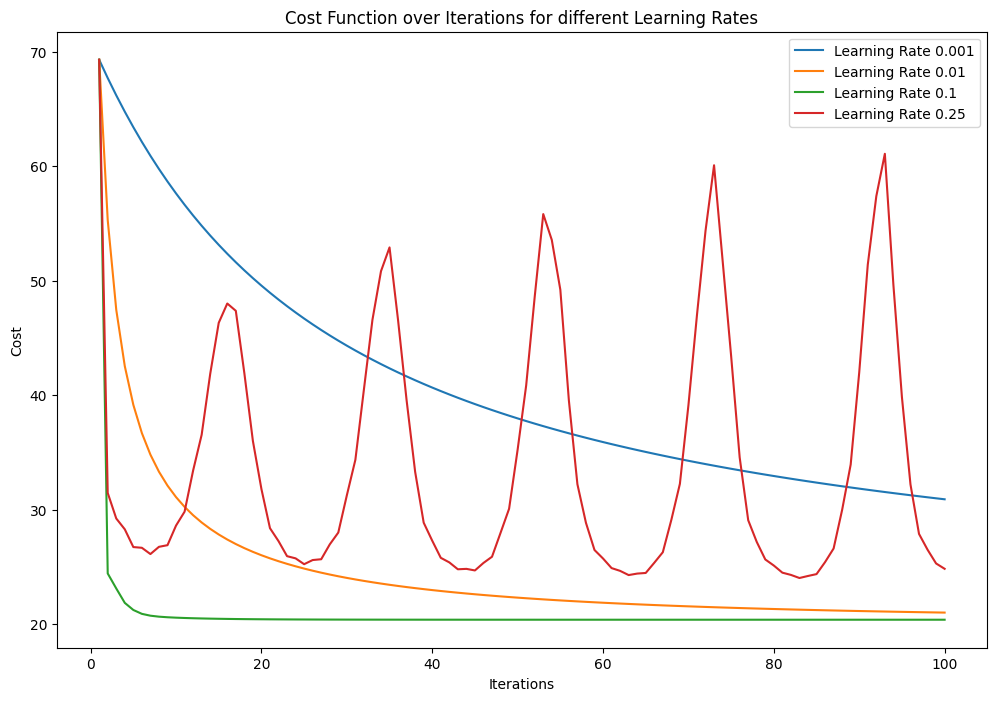

In [79]:
# STUDENT CODE STARTS: adding 0.25
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(train_df[['Exam 1 Score'	,'Exam 2 Score']].values)

m, n = X_scaled.shape
X_with_bias = np.hstack([np.ones((m, 1)), X_scaled])
y = train_df['Admit'].values.reshape(m, 1)

initial_theta = np.zeros((n+1, 1))
learning_rates = [0.001, 0.01, 0.1, 0.25]
iteration = 100

plt.figure(figsize=(12, 8))

for lr in learning_rates:
  model = LogisticRegression(alpha=lr, max_iter=iteration , penalty='l2' , lambd=0.001)
  model.fit(X_with_bias, y)
  cost_history = model.hist_cost_
  print (len(cost_history))
    #theta, cost_history = gradient_descent(X_with_bias, y, initial_theta, learning_rate, iterations)
  plt.plot(range(1, iteration + 1), cost_history[1:], label=f'Learning Rate {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations for different Learning Rates')
plt.legend()
plt.show()



# STUDENT CODE ENDS

# **2. K-Nearest Neighbors [10 pts]**
While doing classification, KNN searches the memorized training instances for the K instances that most closely resemble the new instance and assigns to it the most common class. An alternate way of understanding KNN is by looking at the learned decision boundaries. In this problem, you will implement a function to classify points in the X-Y coordinates using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The training dataset used is the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), and each point in the 2d-space will be classified into one of the three classes using its x-coordinate(sepal length) and y-coordinate(sepal width).

## **2.1. Load Iris Dataset**
Please complete the load_dataset function to
- Populate X_train with iris dataset features. We use only the sepal length and width for this exercise, i.e. the first two columns in the dataset
- Populate y_train with labels (species)
- return X_train and y_train

In [12]:
from sklearn import datasets

def load_iris_dataset():
    '''
    Args:
        None
    Returns: X_train, y_train
    Notes:
        1. Please do not change the provided code
    '''
    # import training data
    iris = datasets.load_iris()
    #n = pd.DataFrame(iris)
    print(type(iris))
    # TODO:
    # Examine the iris variable and initialize the following variables appropriately:
    # 1. X_train - Shape (m, 2): Only use the sepal length and width
    # 2. y_train - Shape (m, ): target labels
    #### Student code starts ####
    df_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    y_train = pd.DataFrame(data=iris.target, columns=['target'])

    X_train = df_features.iloc[:, :2]
    print (X_train)
    print (y_train)
    #y_train = iris [['species']]
    return X_train,y_train
    #### Student code ends ####

# Load the iris dataset first
X_train, y_train = load_iris_dataset()

<class 'sklearn.utils._bunch.Bunch'>
     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]
     target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


## **2.2. Standardise the Features [4 pts, autograded]**
Please complete the standardise_features function to
standardize the features by subtracting the mean and scaling to unit variance. i.e

 z = (x - u) / s

where u is the mean of the training data and s is the standard deviation of the training data.

Here, centering and scaling need to happen independently on each feature (column) of the training data.

**Note**:

Please implement this function yourself.

**Do NOT use sklearn's StandardScaler**.

You are encouraged to use numpy as well as numpy vectorisation/broadcasting techniques to speed up the calculations.

In [13]:
def standardise_features(X_train):

  '''
  Args:
      X_train: Training dataset
  Returns: X_train (After Standardization)
  Notes:
      1. Please do not change the provided code
  '''

  # TODO:
  # 1. Calculate columnwise means and standard deviations
  # 2. Perform columnwise standardisation i.e. subtract off mean and divide by standard deviation
  # 3. Return the standardised data
  #### Student code starts ####
  # print (type(X_train))
  Xnp = X_train
  # Xnp = X_train.to_numpy()
  # print (Xnp)
  # print (type(Xnp))
  # print (Xnp.shape)


  u = np.mean(Xnp , axis = 0)
  s = np.std(Xnp, axis=0)
  print (u)
  print (s)

  X_standardised = (Xnp - u) / s
  return X_standardised

  #### Student code ends ####

X_train = standardise_features(X_train)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
dtype: float64
sepal length (cm)    0.825301
sepal width (cm)     0.434411
dtype: float64


In [82]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_knn_standardise', answer = grader_serialize(standardise_features))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **2.3. Plot KNN Decision Boundary [6 pts, manually graded]**
Please complete the plot_KNN_boundary function to
- train a KNN classifier with k neighbors using the provided X_train and y_train
- make predictions using X_test and save the result as 'y_test'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

def plot_KNN_boundary(k, X_train, y_train):
    '''
    Args:
        k: Number of neighbors to use for kneighbors queries.
        X_train: Training dataset
        y_train: Labels

    Returns:
    Notes:
        1. Please do not change the provided code
        2. save the predicted labels as y_test for plotting
    '''

    # Mesh 2d space into grid to generate X_test and y_test
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    y_test = np.zeros(xx.shape)

    # TODO:
    # 1. train a KNN classifier
    # 2. save the predictions on X_test in y_test
    #### Student code starts ####
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_ = knn.predict(X_test)
    y_test = y_test_.reshape(xx.shape)

    # y_test =


    #### Student code ends ####

    # Put the result into a color plot
    y_test = y_test_.reshape(xx.shape)
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light)

    # Also plot the training points
    iris_target_names = ['setosa', 'versicolor', 'virginica']
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=map(lambda y: iris_target_names[y], y_train),
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))
    plt.xlabel("standardised sepal length")
    plt.ylabel("standardised sepal width")
    plt.show()

Explore the effect of changing k on the learned decision boundaries.
- Submit the plots along with the written homework solutions.
- State whether the model underfits/overfits as k increases and explain why.

In [17]:
# Plot KNN decision boundaries with different k values
def visualize_KNN(X_train, y_train):

    k_list = [1, 4, 11, 15]

    # TODO:
    # 1. Call plot_KNN_boundary function for each value of k in k_list
    #### Student code starts ####
    for k in k_list:
      print (k)
      print(X_train)
      print( y_train)
      plot_KNN_boundary (k, X_train, y_train)
    #### Student code ends ####

# visualize_KNN(X_train, y_train) ### Comment out this line when submitting ###

# **3. Measures of Impurity and their Reduction [15 pts]**
To grow a classification tree, instead of a binary error (1/0), measures of impurity are used to see how good a leaf node is. Recall that we discussed about entropy being one such measure of impurity. We will be working with entropy and comparing it to another metric called the gini index.

## **3.1. Measures of Impurity [9 pts]**

For this problem, consider that you have a binary classification problem of two classes, the positive class $1$ and the negative class $0$.



### **3.1.1. Entropy [2 pts, autograded]**

Please complete the entropy function.

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt

def cross_entropy(prob_class1):

    """
    Returns the cross-entropy value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        ce: The cross-entropy value for the node
    """

    # TODO:
    #### Student code starts ####
    if prob_class1 == 0 or prob_class1 == 1:
        return 0
    ce = -(prob_class1 * np.log2(prob_class1) + (1 - prob_class1) * np.log2(1 - prob_class1))
    return ce

    #### Student code ends ####

assert cross_entropy(0.5) == 1

In [88]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_cross_entropy', answer = grader_serialize(cross_entropy))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **3.1.2. Gini Index [2 pts, autograded]**

Gini index is another measure of impurity. For an K-class classification problem, gini index is calculated as follows.

$$\text{Gini Index} = \sum_{k = 1}^{K} p_k(1 - p_k)$$

Complete the following function for calculating the gini index of a binary-class problem (k = 2).

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt

def gini_index(prob_class1):

    """
    Returns the gini-index value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        gi: The gini-index value for the node
    """

    # TODO:
    #### Student code starts ####
    GI = 0
    for i in range (2):
      GI = GI + (prob_class1 * (1-prob_class1))
    return GI

    #### Student code ends ####

assert gini_index(0.5) == 0.5

In [90]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_index', answer = grader_serialize(gini_index))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **3.1.2. Plot [5 pts, manually graded]**

Please complete the impurity_measures_plot function and generate a plot of the entropy and gini index values with respect to the class 1 probability values. Both the impurity measures should be on the same plot.

- Submit the generated plot along with the written homework solutions.
- Make sure the plot has a title, legend and axes labels.
- Comment on why cross entropy and gini index are suitable measures of impurity based on the plot.

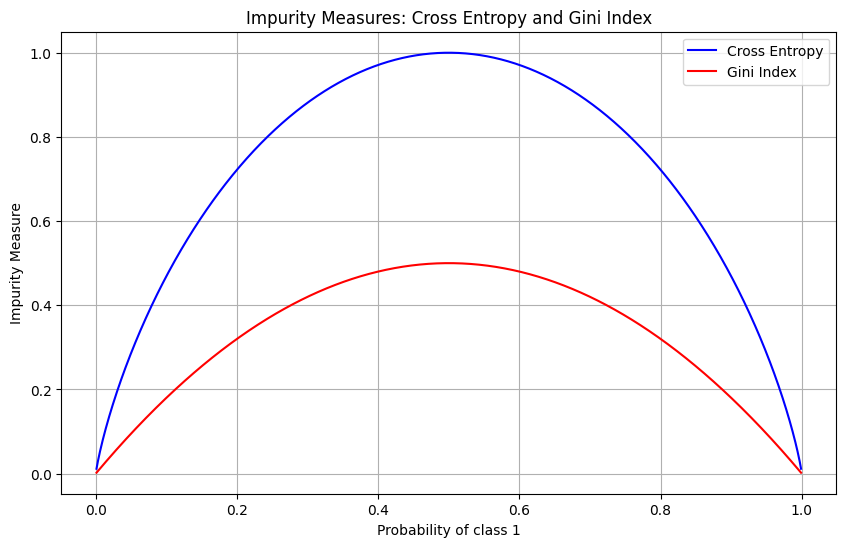

In [20]:
def impurity_measures_plot():

    '''
    Plots the cross entropy and gini index values with respect to the probability values of class 1.

    Args:

    Returns:

    Notes:
        1. Please do not change the provided code
        2. Both cross entropy and gini index should be on the same scatter plot
    '''

    prob_class1_arr = np.arange(1, 1000)/1000
    ce_arr = np.array([cross_entropy(p) for p in prob_class1_arr])
    gi_arr = np.array([gini_index(p) for p in prob_class1_arr])

    # TODO:

    #### Student code starts ####
    plt.figure(figsize=(10, 6))
    plt.plot(prob_class1_arr, ce_arr, label='Cross Entropy', color='blue')
    plt.plot(prob_class1_arr, gi_arr, label='Gini Index', color='red')
    plt.title('Impurity Measures: Cross Entropy and Gini Index')
    plt.xlabel('Probability of class 1')
    plt.ylabel('Impurity Measure')
    plt.legend()
    plt.grid(True)
    plt.show()



    #### Student code ends ####

impurity_measures_plot()

## **3.2. Reduction in Impurity [6 pts]**

Recall that we also discussed information gain which is the change in entropy from the parent node to the children nodes. Gini reduction is similar to information gain except you replace entropy values with gini index.

### **3.2.1. Information Gain [3 pts, autograded]**

In [21]:
def information_gain(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        ig: Information Gain
    """

    # TODO:
    # 1. You will need to calculate cross-entropy for the parent and child nodes
    # 2. Use the above entropies to finally calculate information gain
    #### Student code starts ####

    prob_class1_parent = num_class1_parent / num_samples_parent
    prob_class1_child1 = num_class1_child1 / num_samples_child1
    num_samples_child2 = num_samples_parent - num_samples_child1
    num_class1_child2 = num_class1_parent - num_class1_child1
    prob_class1_child2 = num_class1_child2 / num_samples_child2 if num_samples_child2 != 0 else 0

    ce_parent = cross_entropy(prob_class1_parent)

    ce_child1 = cross_entropy(prob_class1_child1)

    ce_child2 = cross_entropy(prob_class1_child2)

    weighted_ce_children = (num_samples_child1 / num_samples_parent) * ce_child1 + \
                           (num_samples_child2 / num_samples_parent) * ce_child2

    ig = ce_parent - weighted_ce_children

    return ig

    #### Student code ends ####


assert np.abs(information_gain(100, 60, 30, 5) - 0.251) < 0.01

In [24]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_information_gain', answer = (grader_serialize(cross_entropy), grader_serialize(information_gain)))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **3.2.2. Gini Reduction [3 pts, autograded]**

In [22]:


def gini_reduction(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        gr: Gini Reduction
    """

    # TODO:
    #### Student code starts ####

    prob_class1_parent = num_class1_parent / num_samples_parent
    prob_class1_child1 = num_class1_child1 / num_samples_child1
    num_samples_child2 = num_samples_parent - num_samples_child1
    num_class1_child2 = num_class1_parent - num_class1_child1
    prob_class1_child2 = num_class1_child2 / num_samples_child2 if num_samples_child2 != 0 else 0

    ce_parent = gini_index(prob_class1_parent)

    ce_child1 = gini_index(prob_class1_child1)

    ce_child2 = gini_index(prob_class1_child2)

    weighted_ce_children = (num_samples_child1 / num_samples_parent) * ce_child1 + \
                           (num_samples_child2 / num_samples_parent) * ce_child2

    ig = ce_parent - weighted_ce_children

    return ig
    #### Student code ends ####



assert np.abs(gini_reduction(100, 60, 30, 5) - 0.161) < 0.01

In [23]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_reduction', answer = (grader_serialize(gini_index), grader_serialize(gini_reduction)))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **4. Decision Tree [35 pts]**

In this section you will be training a decision tree classifier to predict the presence of diabetes in a person given various input features. The diabetes dataset that we are using is from the [2013-2014  National Health and Nutrition Examination Survey (NHANES)](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx). We have reduced the dataset to only 20 features but the original dataset had over 1,800 features. `cis519_hw1_diabetes_train.csv` and `cis519_hw1_diabetes_X_test.csv` are the datasets that you would be using for training and testing respectively.

## **4.1. Load Datasets**

Read the files `cis519_hw1_diabetes_train.csv` and `cis519_hw1_diabetes_X_test.csv` into train_df and test_df respectively in the `load_diabetes_datasets` function.

In [25]:
import pandas as pd

def load_diabetes_datasets():
    '''
    Args:
        None
    Returns:
        train_df, test_df
    '''

    # TODO:
    #### Student code starts ####
    train_df = pd.read_csv('cis519_hw1_diabetes_train.csv')

    test_df = pd.read_csv ('cis519_hw1_diabetes_X_test.csv')

    return train_df, test_df

    #### Student code ends ####

In [105]:
t,tt= load_diabetes_datasets()

In [106]:
t

,OHQ575Q,INDFMPIR,LBDSGBSI,OHQ565,DIABETIC,OHX28CSC,OHX19SE,URDECPLC,BMXBMI,BMXWT,...,DMDEDUC2,RIDAGEYR,LBXTC,ALQ120Q,BMXWAIST,BPQ020,RIDRETH1,BMXLEG,RIAGENDR,BMXHT
0,NaN,1.52,28.0,NaN,0,NaN,0.0,0.0,20.2,59.2,...,NaN,18,154.0,NaN,75.5,2.0,5,42.0,1,171.0
1,NaN,3.09,28.0,NaN,0,NaN,NaN,NaN,21.1,61.8,...,3.0,57,224.0,1.0,90.7,2.0,2,39.0,2,171.0
2,NaN,5.00,29.0,NaN,0,NaN,NaN,NaN,22.1,63.1,...,4.0,29,170.0,2.0,81.2,2.0,2,40.0,2,169.0
3,NaN,5.00,NaN,NaN,0,NaN,NaN,NaN,NaN,6.8,...,NaN,0,NaN,NaN,NaN,NaN,1,NaN,2,NaN
4,NaN,2.13,31.0,NaN,0,NaN,NaN,0.0,21.7,65.8,...,3.0,61,115.0,7.0,77.2,1.0,3,41.5,1,174.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,NaN,NaN,5,NaN,2,NaN
8136,NaN,1.29,31.0,NaN,0,NaN,NaN,0.0,30.6,87.9,...,1.0,79,184.0,0.0,117.5,2.0,1,39.0,1,169.4
8137,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,31.7,90.4,...,NaN,17,NaN,NaN,108.7,2.0,4,41.7,2,168.9
8138,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2.0,58,NaN,NaN,NaN,2.0,4,NaN,1,NaN


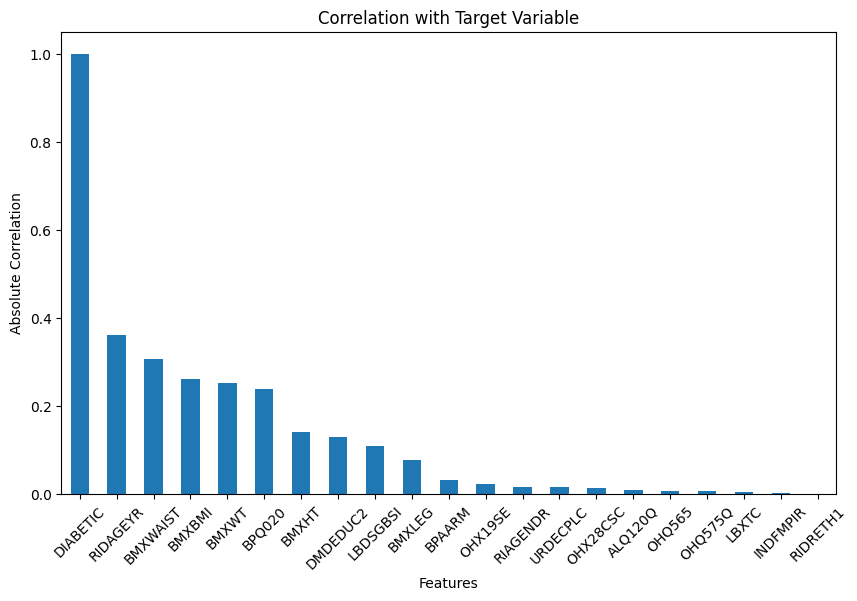

In [146]:
correlation = t.corr()['DIABETIC'].abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.show()


LBDSGBSI, BPAARM, OHX19SE can be included among the features.

## **4.2. Preprocess Datasets [10 pts, autograded]**

The datasets we have provided are not ready-to-use for machine learning and requires preprocessing. We want you to perform feature selection and handle missing values in both the training and test datasets.

### **4.2.1. Feature Selection**

For feature selection, you should retain the following features at least and experiment including/excluding the remaining features.

- 'RIDAGEYR'
- 'BMXWAIST'
- 'BMXHT'
- 'LBXTC'
- 'BMXLEG'
- 'BMXWT'
- 'BMXBMI'
- 'RIDRETH1'
- 'BPQ020'
- 'ALQ120Q'
- 'DMDEDUC2'
- 'RIAGENDR'
- 'INDFMPIR'

The column `DIABETIC` in the training dataset is the target variable.

### **4.2.2. Handling Missing Values**

We recommend you to drop rows with missing values in the training set. However, you should not drop rows with missing values in the test set. Instead, you should impute missing values in the test set with the mean of the corresponding columns in the training set.

In [26]:
train_df, test_df = load_diabetes_datasets()

# Preprocessing
def preprocess_datasets(train_df, test_df ):
    '''
    Args:
        train_df
        test_df
    Returns:
        train_df (preprocessed)
        test_df (preprocessed)
    Note:
        1. At least the following columns should be present in the final train_df:
            - 'RIDAGEYR'
            - 'BMXWAIST'
            - 'BMXHT'
            - 'LBXTC'
            - 'BMXLEG'
            - 'BMXWT'
            - 'BMXBMI'
            - 'RIDRETH1'
            - 'BPQ020'
            - 'ALQ120Q'
            - 'DMDEDUC2'
            - 'RIAGENDR'
            - 'INDFMPIR'
            - 'DIABETIC'
        2. test_df will have all the columns in train_df except the 'DIABETIC' column
        3. Drop any rows in train_df that have missing values
        4. DO NOT drop rows with missing values test_df. Impute missing values in test_df with the means of the corresponding columns in train_df.
    '''

    # TODO:
    #### Student code starts ####
    required_columns = ['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG',
                        'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q',
                        'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'DIABETIC']

    train_df = train_df[required_columns]
    test_columns = required_columns[:-1]
    test_df = test_df[test_columns]

    train_df.dropna(inplace=True)

    for column in test_columns:
        if column in test_df.columns:
            test_df[column].fillna(train_df[column].mean(), inplace=True)

    return train_df, test_df

train_df, test_df = load_diabetes_datasets()

train_df, test_df = preprocess_datasets(train_df, test_df)

    #### Student code ends ####
train_df_processed, test_df_processed = preprocess_datasets(train_df, test_df)


<ipython-input-26-9183703cd98c>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.dropna(inplace=True)
<ipython-input-26-9183703cd98c>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[column].fillna(train_df[column].mean(), inplace=True)


In [27]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_preprocess_datasets', answer = (train_df_processed.to_csv(index=False), test_df_processed.to_csv(index=False)))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [110]:
# train_df_processed[x].mean()
# x in list of colomns

## **4.3. Decision Tree Training with Pruning [14 pts autograded]**

Next, we will be fitting a decision tree classifier and prune the tree appropriately. The `DecisionTreeClassifier` in scikit-learn uses a way of pruning called **Minimal Cost-Complexity Pruning**. We won't cover the specifics, but you can learn more from this [link](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) if you wish. But, you don't need to learn the details in order to use it effectively. The amount of pruning is entirely dependent on the value of the `ccp_alpha` parameter. In order to tune the `ccp_alpha` parameter, you will use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). The purpose of cross-validation is to estimate how well a model will generalize on unseen data.

Implement the function `best_ccp_alpha_f1` to do automatic tuning of the `ccp_alpha` parameter.  Your function should vary the value of the `ccp_alpha` parameter and return the value for `ccp_alpha` with the highest cross-validation F1 score over the given dataset `train_df`. The sklearn library has a [built-in function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) to generate a list of effective ccp_alphas. Given the imbalanced nature of the dataset, most of the people in the data set are non-diabetic. You can get a model with very high test accuracy by always predicting no one is diabetic. To address this problem, more importance should be given to the [F1 score](https://en.wikipedia.org/wiki/F-score) of your model rather than the classification accuracy.

Once you are done with your modeling process, test your model on the test dataset and output your predictions into the PennGrader.

For this problem, you need to have at least 80% accuracy and a F1 score of 0.2 on the test dataset to get full points.

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

train_df, test_df = preprocess_datasets(train_df, test_df)

def best_ccp_alpha_f1(train_df):
    """
    Returns the pruning parameter (best_ccp_alpha) with the highest cross-validation F1 score along with the
    five cross-validation F1 scores corresponding (cv_f1_scores).

    Args:
        train_df

    Returns:
        best_ccp_alpha: the tuned best ccp alpha value
        cv_f1_scores: the five cross-validation F1 scores

    """

    # TODO:
    #### Student code starts ####
    X_train = train_df.drop('DIABETIC', axis=1)
    y_train = train_df['DIABETIC']

    firsttree = DecisionTreeClassifier (random_state = 40)

    ccp_alphas = firsttree.cost_complexity_pruning_path(X_train, y_train).ccp_alphas
    avg_f1_scores = []

    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
        avg_f1_scores.append(np.mean(f1_scores))

    best_score_index = np.argmax(avg_f1_scores)
    best_ccp_alpha = ccp_alphas[best_score_index]
    cv_f1_scores = avg_f1_scores[best_score_index]

    return best_ccp_alpha, cv_f1_scores, avg_f1_scores

    #### Student code ends ####

def refit_and_predict(train_df, test_df, best_ccp_alpha):
    """
    Fit a decision tree classifier on the training data using the best_ccp_alpha value and output the predictions on the
    test set.

    Args:
        train_df
        test_df
        best_ccp_alpha

    Returns:
        y_test_pred: The predicted values for the test set
    """
    X_train = train_df.drop('DIABETIC', axis=1)
    y_train = train_df['DIABETIC']
    X_test = test_df

    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)

    return y_test_pred

    # TODO:
    #### Student code starts ####

    #### Student code ends ####

best_ccp_alpha, cv_f1_scores,_ = best_ccp_alpha_f1(train_df)
y_test_pred = refit_and_predict(train_df, test_df, best_ccp_alpha)

In [53]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_refit_and_predict', answer = y_test_pred)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **4.4. Computing Confidence Intervals [5 pts, autograded]**

Even though you may have computed the average F1 score across the held-out folds during cross validation, how confident can you be that the number you computed is the true F1 score for that set of features? If you try rerunning your code with a different random seed, you may actually get a different F1 score. But which one is right?

In order to answer this question, we will compute a confidence interval based on the Student's t-distribution, which will tell us with 99\% confidence that the true mean is within a lower and upper bound. To compute the confidence interval, we need to compute the sample mean, $\bar{x}$, sample standard deviation, $S$, and the number of observations for each classifier, $n$. ***In our specific case, the number of observations should be 5 because we have 5 reported F1 scores from cross-validation.***

Then, the confidence interval is computed by
    
$$\bar{x} \pm t \cdot \frac{S}{\sqrt{n}}$$

Here, $t$ is the critical value, which we can look up using the provided t-table (https://www.stat.colostate.edu/inmem/gumina/st201/pdf/Utts-Heckard_t-Table.pdf). (Round up the critical value to the second digit below the decimal point) For example, when $n=10$, if we are looking for a 99\% confidence interval, then the number in the 99\% confidence column with degrees of freedom of $n-1=9$ would be $t=3.25$. Then, we can plug in all of the statistics into the confidence interval formula and get a range of values for which we are 99\% confident that the true F1 score of the classifier falls between.

For this computation, we should use the unbiased estimator of the variance, which means that the degrees of freedom on the standard deviation calculation must be set. Look in the optional arguments of np.std to learn more.

In [54]:


def calculate_confidence_interval(cv_f1_scores):
    from scipy.stats import t

    '''
    Args:
        cv_f1_scores      :   np.array, reported cross-validation F1 scores
    Returns:
        interval    :   np.array, lower bound and upper bound of the 99% confidence interval
    '''

    # TODO: this function should be able to handle two confidence levels of 99% and 80%
    #### Student code starts ####
    confidence_level = 0.99
    n = len(cv_f1_scores)
    df = n - 1
    mean_f1 = np.mean(cv_f1_scores)
    std_f1 = np.std(cv_f1_scores, ddof=1)
    t_critical = round(t.ppf((1 + confidence_level) / 2, df),2)


    margin_of_error = t_critical * (std_f1 / np.sqrt(n))
    interval = np.array([mean_f1 - margin_of_error, mean_f1 + margin_of_error])
    return interval


In [55]:
 def test_confidence_intervals():
    data = np.array([15.6, 16.2, 22.5, 20.5, 16.4])
    result = np.round(calculate_confidence_interval(data), 3)
    interval = np.array([11.918, 24.562])
    assert (np.array_equal(interval, result))

test_confidence_intervals()

In [32]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_confidence_intervals', answer = grader_serialize(calculate_confidence_interval))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [56]:
ccp = []
f11 = []
cvscc =[]

In [84]:
ccpa , f1, arrf1 = best_ccp_alpha_f1(train_df)
print( f1)
cvsc= calculate_confidence_interval(arrf1)
ccp.append(ccpa)
f11.append(f1)
cvscc.append(cvsc)

0.31203981437527084


In [85]:
print (ccp)
print (f11)
print (cvscc)

[0.0005555555555555556, 0.00031267448352875494, 0.0007551345897210558]
[0.332486686238456, 0.3382617005029521, 0.31203981437527084]
[array([0.30103147, 0.31798942]), array([0.30204649, 0.32479512]), array([0.27341141, 0.2946555 ])]


## **4.5. Performance Table [6 pts, manually graded]**

Repeat the process for two other sets of features and present a performance table (like the one shown below) that compares the F1 scores and confidence intervals of the three sets of features, indicating which one is your chosen best set. Remember that each set should include the 13 features mentioned earlier. As mentioned earlier, submit this table along with the written homework solutions as this is manually graded.

---

S.No. | Features | Best CCP Alpha | Mean Cross-validation F1 Score | Cross-validation F1 Score Confidence Interval
--- | --- | --- | --- | ---
1 | Set 1 | | |
2 | Set 2 | | |
3 | Set 3 | | |


In [87]:
list1 = [1,2,3]
list2 = ['The minimum features in the prompt' , ' + LBDSGBSI' , ' + BPAARM']
df = pd.DataFrame({'S.No.': list1, 'Features': list2, 'Best CCP Alpha': ccp , 'Mean Cross-validation F1 Score': f11 , 'Cross-validation F1 Score Confidence Interval' : cvscc})

In [88]:
df


,S.No.,Features,Best CCP Alpha,Mean Cross-validation F1 Score,Cross-validation F1 Score Confidence Interval
0,1,The minimum features in the prompt,0.000556,0.332487,"[0.3010314731408295, 0.31798941898614913]"
1,2,+ LBDSGBSI,0.000313,0.338262,"[0.30204648552294594, 0.3247951196790097]"
2,3,+ BPAARM,0.000755,0.312040,"[0.27341141245283707, 0.2946554962224396]"


## with another column - LBDSGBSI

In [71]:
def preprocess_datasets(train_df, test_df ):
    '''
    Args:
        train_df
        test_df
    Returns:
        train_df (preprocessed)
        test_df (preprocessed)
    Note:
        1. At least the following columns should be present in the final train_df:
            - 'RIDAGEYR'
            - 'BMXWAIST'
            - 'BMXHT'
            - 'LBXTC'
            - 'BMXLEG'
            - 'BMXWT'
            - 'BMXBMI'
            - 'RIDRETH1'
            - 'BPQ020'
            - 'ALQ120Q'
            - 'DMDEDUC2'
            - 'RIAGENDR'
            - 'INDFMPIR'
            - 'DIABETIC'
        2. test_df will have all the columns in train_df except the 'DIABETIC' column
        3. Drop any rows in train_df that have missing values
        4. DO NOT drop rows with missing values test_df. Impute missing values in test_df with the means of the corresponding columns in train_df.
    '''

    # TODO:
    #### Student code starts ####
    required_columns = ['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG',
                        'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q',
                        'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'LBDSGBSI', 'DIABETIC' ]

    train_df = train_df[required_columns]
    test_columns = required_columns[:-1]
    test_df = test_df[test_columns]

    train_df.dropna(inplace=True)

    for column in test_columns:
        if column in test_df.columns:
            test_df[column].fillna(train_df[column].mean(), inplace=True)

    return train_df, test_df

train_df, test_df = load_diabetes_datasets()

train_df, test_df = preprocess_datasets(train_df, test_df)

    #### Student code ends ####
train_df_processed, test_df_processed = preprocess_datasets(train_df, test_df)


## with another column - BPAARM :

In [80]:
def preprocess_datasets(train_df, test_df ):
    '''
    Args:
        train_df
        test_df
    Returns:
        train_df (preprocessed)
        test_df (preprocessed)
    Note:
        1. At least the following columns should be present in the final train_df:
            - 'RIDAGEYR'
            - 'BMXWAIST'
            - 'BMXHT'
            - 'LBXTC'
            - 'BMXLEG'
            - 'BMXWT'
            - 'BMXBMI'
            - 'RIDRETH1'
            - 'BPQ020'
            - 'ALQ120Q'
            - 'DMDEDUC2'
            - 'RIAGENDR'
            - 'INDFMPIR'
            - 'DIABETIC'
        2. test_df will have all the columns in train_df except the 'DIABETIC' column
        3. Drop any rows in train_df that have missing values
        4. DO NOT drop rows with missing values test_df. Impute missing values in test_df with the means of the corresponding columns in train_df.
    '''

    # TODO:
    #### Student code starts ####
    required_columns = ['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG',
                        'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q',
                        'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'LBDSGBSI', 'BPAARM'  ,'DIABETIC' ]

    train_df = train_df[required_columns]
    test_columns = required_columns[:-1]
    test_df = test_df[test_columns]
    train_df.dropna(inplace=True)

    for column in test_columns:
        if column in test_df.columns:
            test_df[column].fillna(train_df[column].mean(), inplace=True)

    return train_df, test_df

train_df, test_df = load_diabetes_datasets()

train_df, test_df = preprocess_datasets(train_df, test_df)

    #### Student code ends ####
train_df_processed, test_df_processed = preprocess_datasets(train_df, test_df)

# **5. [Added] Logistic Regression VS. Decision Tree [36 pts]**

Let's revisit the Logistic Regression model and compare the performance of it and with Decision Tree on the Diabietes dataset.

## **5.1. Fit the Logistic Regression on Diabetes dataset [14 pts, autograded]**

Fit a simple logistic regression on the training data using l2 penalty, $\alpha$ = 0.01, maximum of iterations = 1000, and weight for the regularization consant for the l2 penalty  term is 0.001.
You should be rescaling features using MinMaxScaler from sklearn.preprocessing to make sure that the features are properly scaled for learning.

In [62]:
train_df, test_df = load_diabetes_datasets()
train_df, test_df = preprocess_datasets(train_df, test_df)

In [43]:
from sklearn.preprocessing import MinMaxScaler

def fit_and_predict_logistic(train_df, test_df):
    """
    Fit a logistic regression classifier on the training data and output the predictions on the
    test set.

    Args:
        train_df
        test_df

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO:
    #### Student code starts ####
    X_train = train_df.drop('DIABETIC', axis=1)
    y_train = train_df['DIABETIC']
    X_test = test_df

    scaler = MinMaxScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    logistic_model = LogisticRegression(alpha=0.01, max_iter=1000 , penalty='l2', lambd=0.001)  # Increase max_iter if needed
    print (type(X_train_scaled))
    print (type(y_train))
    y_train = np.array (y_train)
    logistic_model.fit(X_train_scaled, y_train)

    y_test_pred = logistic_model.predict(X_test_scaled)

    return y_test_pred

    #### Student code ends ####

y_test_pred_logistic = fit_and_predict_logistic(train_df, test_df)

print(y_test_pred_logistic)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[0 0 0 ... 1 0 0]


In [44]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_fit_and_predict_logistic', answer = y_test_pred_logistic)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **5.2. Find the Best Hyperparameter Alpha [16 pts, autograded]**

Find the best alpha that has the highest mean value of f1 scores across 5-fold cross-validation. You should use the same min-max scaler and your candidates for `alpha` should be `[0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05]`. Use the same values for `max_iter`, `lambd` and `penalty` as 5.1. You can still use the `cross_val_score` from scikitlearn here.

In [46]:
import warnings, tqdm

#suppress warnings
warnings.filterwarnings('ignore')

def best_alpha_f1_logistic(train_df):
    """
    Returns the learning rate (alpha) with the highest mean cross-validation F1 score along with the
    five cross-validation F1 scores corresponding to the alpha(cv_f1_scores).

    Args:
        train_df

    Returns:
        best_alpha: the tuned best ccp alpha value
        cv_f1_scores: the five cross-validation F1 scores for the best_alpha

    """

    # TODO:
    #### Student code starts ####
        # Separate the features and target variable
    X = train_df.drop('DIABETIC', axis=1)
    y = train_df['DIABETIC']

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    alpha_values = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05]
    # C_values = [1/a for a in alpha_values]  # Convert alpha to C (inverse relationship)

    best_alpha = None
    best_score = -np.inf
    best_scores = []

    for C in tqdm.tqdm(alpha_values):
        model = LogisticRegression(alpha=C, max_iter=1000 , penalty='l2', lambd=0.001)
        scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
        mean_score = np.mean(scores)
        if mean_score > best_score:
            best_score = mean_score
            best_alpha = C
            best_scores = scores

    return best_alpha, best_scores

    #### Student code ends ####

def refit_and_predict_logistic(train_df, test_df, best_alpha):
    """
    Fit a logistic regressor on the training data using the best_alpha value and output the predictions on the
    test set.

    Args:
        train_df
        test_df
        best_alpha

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO:
    #### Student code starts ####
    X_train = train_df.drop('DIABETIC', axis=1)
    y_train = train_df['DIABETIC']
    X_test = test_df

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(alpha=best_alpha, max_iter=1000 , penalty='l2', lambd=0.001)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)

    return y_test_pred

    #### Student code ends ####

In [81]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
# print(y_train)
best_alpha, cv_f1_scores = best_alpha_f1_logistic(train_df)
y_test_pred_refit_logistic = refit_and_predict_logistic(train_df, test_df, best_alpha)
confidence_interval_logistic = calculate_confidence_interval(cv_f1_scores)

100%|██████████| 9/9 [00:38<00:00,  4.22s/it]


In [48]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_refit_and_predict_logistic_confidence_interval', answer = (y_test_pred_refit_logistic, confidence_interval_logistic))

Correct! You earned 16/16 points. You are a star!

Your submission has been successfully recorded in the gradebook.


End of trials, should not be included

In [68]:
ccp2 = []
f112 = []
cvscc2 = []

In [82]:

# ccpa2 , f12, arrf12 = best_ccp_alpha_f1(train_df)
# print( f12)
# cvsc2 = calculate_confidence_interval(arrf12)
ccp2 .append(best_alpha)
f112.append(cv_f1_scores)
cvscc2.append(confidence_interval_logistic)

In [83]:
print (ccp2)
print (f112)
print (cvscc2)

[0.01, 0.01, 0.02]
[0.332486686238456, array([0.17647059, 0.47297297, 0.39164491, 0.3220339 , 0.29457364]), array([0.3442623 , 0.54187192, 0.37340153, 0.19047619, 0.        ])]
[array([0.37345082, 0.47145992]), array([0.10357384, 0.55950456]), array([-0.13077149,  0.71077627])]


In [91]:
newl = []
for i in range(len(f112)):
  newl.append(np.mean(f112[i]))

newl

[0.332486686238456, 0.33153920230807854, 0.2900023882534556]

## **5.3. Performance Table [6 pts, manually graded]**

Using the 3 best features from 4.5, repeat the process with logistic regression, ultimately finding Cross-validation F1 Score Confidence Interval. As mentioned earlier, submit this table along with the written homework solutions as this is manually graded. (Note: although F1 scores are always positive, the 99% confidence interval may appear as one end being negative. Although this is not ideal, it is still possible if the fold number is small or the average F1 value is small.)

---

S.No. | Features | Best Alpha | Mean Cross-validation F1 Score | Cross-validation F1 Score Confidence Interval
--- | --- | --- | --- | ---
1 | Set 1 | | |
2 | Set 2 | | |
3 | Set 3 | | |

In [92]:
list1 = [1,2,3]
list2 = ['The minimum features in the prompt' , ' + LBDSGBSI' , ' + BPAARM']
df = pd.DataFrame({'S.No.': list1, 'Features': list2, 'Best Alpha': ccp2 , 'Mean Cross-validation F1 Score': newl , 'Cross-validation F1 Score Confidence Interval' : cvscc2})

In [93]:
df

,S.No.,Features,Best Alpha,Mean Cross-validation F1 Score,Cross-validation F1 Score Confidence Interval
0,1,The minimum features in the prompt,0.01,0.332487,"[0.37345082003468566, 0.47145991637139406]"
1,2,+ LBDSGBSI,0.01,0.331539,"[0.10357384438517778, 0.5595045602309793]"
2,3,+ BPAARM,0.02,0.290002,"[-0.13077148993687226, 0.7107762664437834]"


# Submission

- Submit the notebook as a `.ipynb` file to the coding portion of the Gradescope submission. This can be done in Google Colab via the `File - Download .ipynb` menu option.